In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense

In [3]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs #no supervisado
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/machine learning/Entregas/Proyecto final/Google_Stock_Price_Train.csv",  index_col='Date', parse_dates=['Date'])

In [6]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...
2016-12-23,790.90,792.74,787.28,789.91,"623,400"
2016-12-27,790.68,797.86,787.66,791.55,"789,100"
2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"


In [7]:
print(data.shape)
print(data.dtypes)

(1258, 5)
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object


In [8]:
obj_cols = ['Volume', 'Close'] #convertir variables a numericas
data[obj_cols] = data[obj_cols].replace('[\,,]', '', regex=True).astype(float)

In [9]:
print(data.dtypes)

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object


Normalizacion de datos

In [10]:
X= np.array(data.iloc[:, [0, 1, 2, 4]])
y= np.array(data['Close'])
print('X {}\n y {}'.format(X.shape,y.shape))

X (1258, 4)
 y (1258,)


In [11]:
sc = MinMaxScaler(feature_range=(0,1))
sc_x = MinMaxScaler(feature_range=(0,1))

y = y.reshape(-1, 1)
y= sc.fit_transform(y)

X= sc_x.fit_transform(X)
print(y.shape)

(1258, 1)


In [12]:
y

array([[0.23757287],
       [0.24151427],
       [0.22878051],
       ...,
       [0.40495845],
       [0.40184391],
       [0.38672602]])

In [13]:
X

array([[0.08581368, 0.09640129, 0.09044931, 0.29525831],
       [0.09701243, 0.09834351, 0.09823458, 0.22993592],
       [0.09433366, 0.09251685, 0.09408623, 0.26361233],
       ...,
       [0.95725128, 0.95807422, 0.95844067, 0.04589107],
       [0.93796041, 0.94257381, 0.95033338, 0.02949139],
       [0.93688146, 0.93669113, 0.93421352, 0.07056868]])

Division de datos

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=40) 
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1006, 4) (252, 4) (1006, 1) (252, 1)


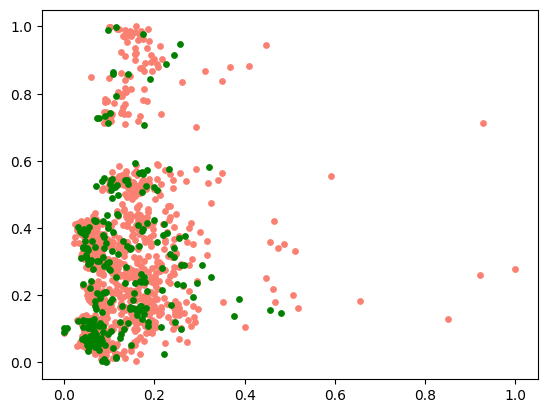

In [15]:
plt.scatter(X_train[:,3], Y_train, c='salmon',s=15)
plt.scatter(X_test[:,3], Y_test, c='g',s=15)

In [16]:
#ajustar las dimensiones de x
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
print(X_train.shape)

(252, 4, 1)
(1006, 4, 1)


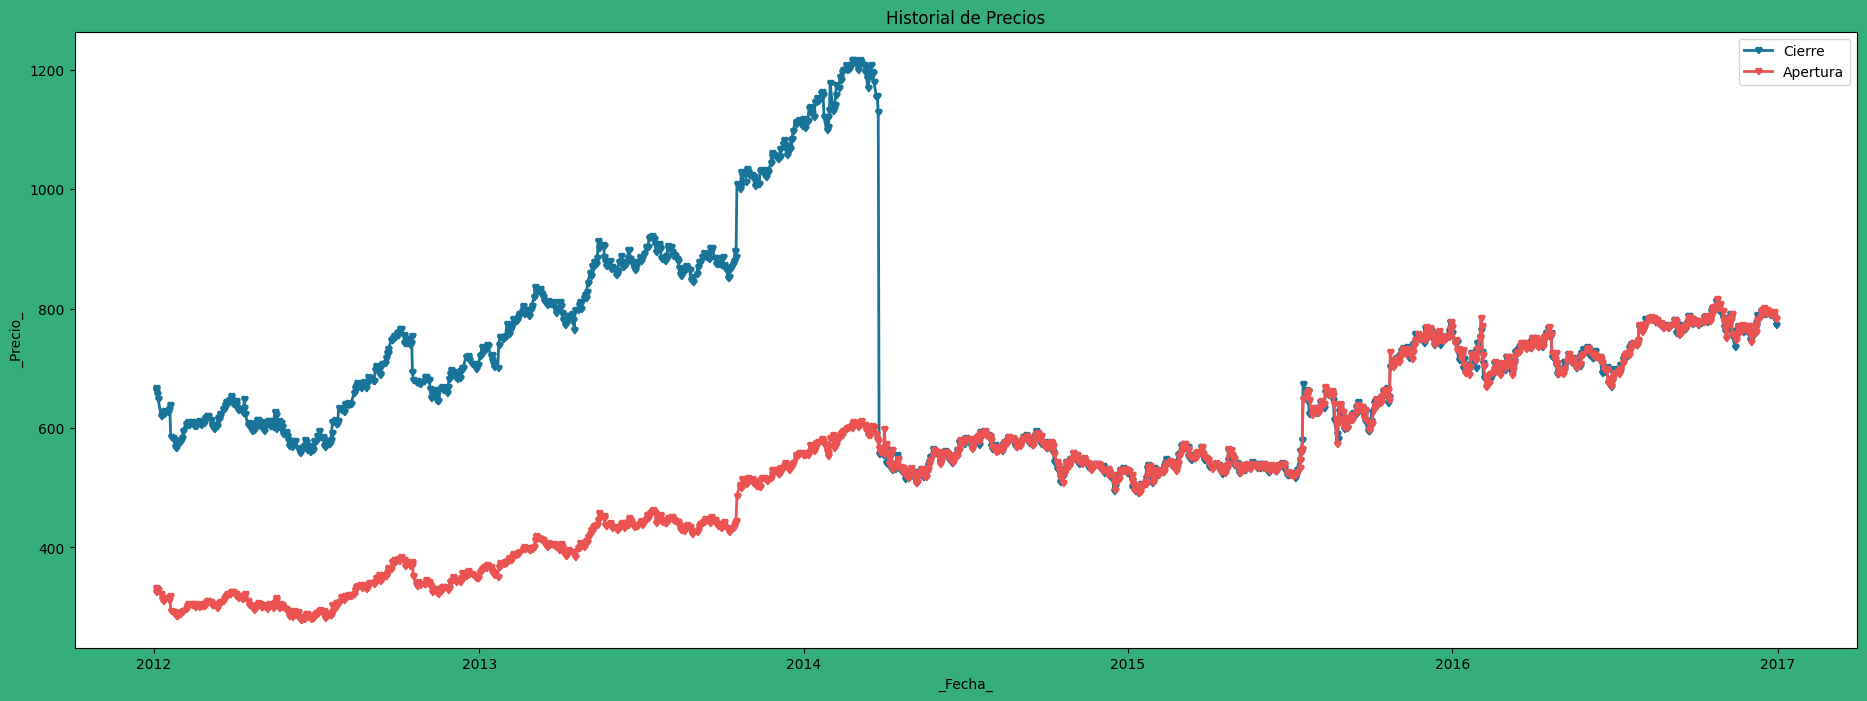

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(23, 8))
fig.set_facecolor('#36AE7C')
ax.plot(data['Close'], marker="$♥$",markersize=5, linewidth=2,linestyle='solid', color="#187498")
ax.plot(data['Open'], marker = "$♥$",markersize=5,linewidth=2,linestyle='solid' ,color="#EB5353")
plt.title('Historial de Precios')
plt.xlabel('_Fecha_')
plt.ylabel('_Precio_')
ax.legend(['Cierre','Apertura'])
ax.set_facecolor("#ffffff")

plt.show()
#validar el historial de precios de cierre y apertura

Creación de modelo

In [55]:
modelo = Sequential()
modelo.add(LSTM(60,activation = 'relu', return_sequences=True, input_shape=(X_train.shape[1],1)))
modelo.add(LSTM(60,activation = 'relu', return_sequences=True))

modelo.add(LSTM(80))
#modelo.add(LSTM(32))

modelo.add(Dense(40))
modelo.add(Dense(1))

modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 4, 60)             14880     
                                                                 
 lstm_7 (LSTM)               (None, 4, 60)             29040     
                                                                 
 lstm_8 (LSTM)               (None, 80)                45120     
                                                                 
 dense_4 (Dense)             (None, 40)                3240      
                                                                 
 dense_5 (Dense)             (None, 1)                 41        
                                                                 
Total params: 92,321
Trainable params: 92,321
Non-trainable params: 0
_________________________________________________________________


In [19]:
modelo

In [56]:
modelo.compile(optimizer='adam', loss='mean_squared_error')

Entrenamiento de modelo

In [57]:
modelo.fit(X_train,Y_train, batch_size=10, epochs=80) #20 y 100

Epoch 1/80
101/101 [==============================] - 7s 10ms/step - loss: 0.0570
Epoch 2/80
101/101 [==============================] - 1s 10ms/step - loss: 0.0516
Epoch 3/80
101/101 [==============================] - 1s 10ms/step - loss: 0.0499
Epoch 4/80
101/101 [==============================] - 1s 10ms/step - loss: 0.0491
Epoch 5/80
101/101 [==============================] - 1s 10ms/step - loss: 0.0483
Epoch 6/80
101/101 [==============================] - 1s 10ms/step - loss: 0.0460
Epoch 7/80
101/101 [==============================] - 1s 10ms/step - loss: 0.0420
Epoch 8/80
101/101 [==============================] - 1s 12ms/step - loss: 0.0372
Epoch 9/80
101/101 [==============================] - 2s 15ms/step - loss: 0.0365
Epoch 10/80
101/101 [==============================] - 2s 15ms/step - loss: 0.0313
Epoch 11/80
101/101 [==============================] - 1s 13ms/step - loss: 0.0322
Epoch 12/80
101/101 [==============================] - 1s 10ms/step - loss: 0.0277
Epoch 13/80
1

Realizar predicciones y aplicar metricas

In [58]:
from sklearn.metrics import mean_squared_error
predicciones = modelo.predict(X_test)
#y_pred = sc.inverse_transform(predicciones)

8/8 [==============================] - 1s 6ms/step


In [59]:
from sklearn.metrics import r2_score
# Calcula el RMSE
rmse = np.sqrt(mean_squared_error(Y_test, predicciones))

# Calcular R2
r2 = r2_score(Y_test, predicciones)
print("R2:", r2)
print("RMSE:", rmse) #un valor de ECM bajo indica un buen ajuste del modelo,

R2: 0.516058996084545
RMSE: 0.15064406761719681


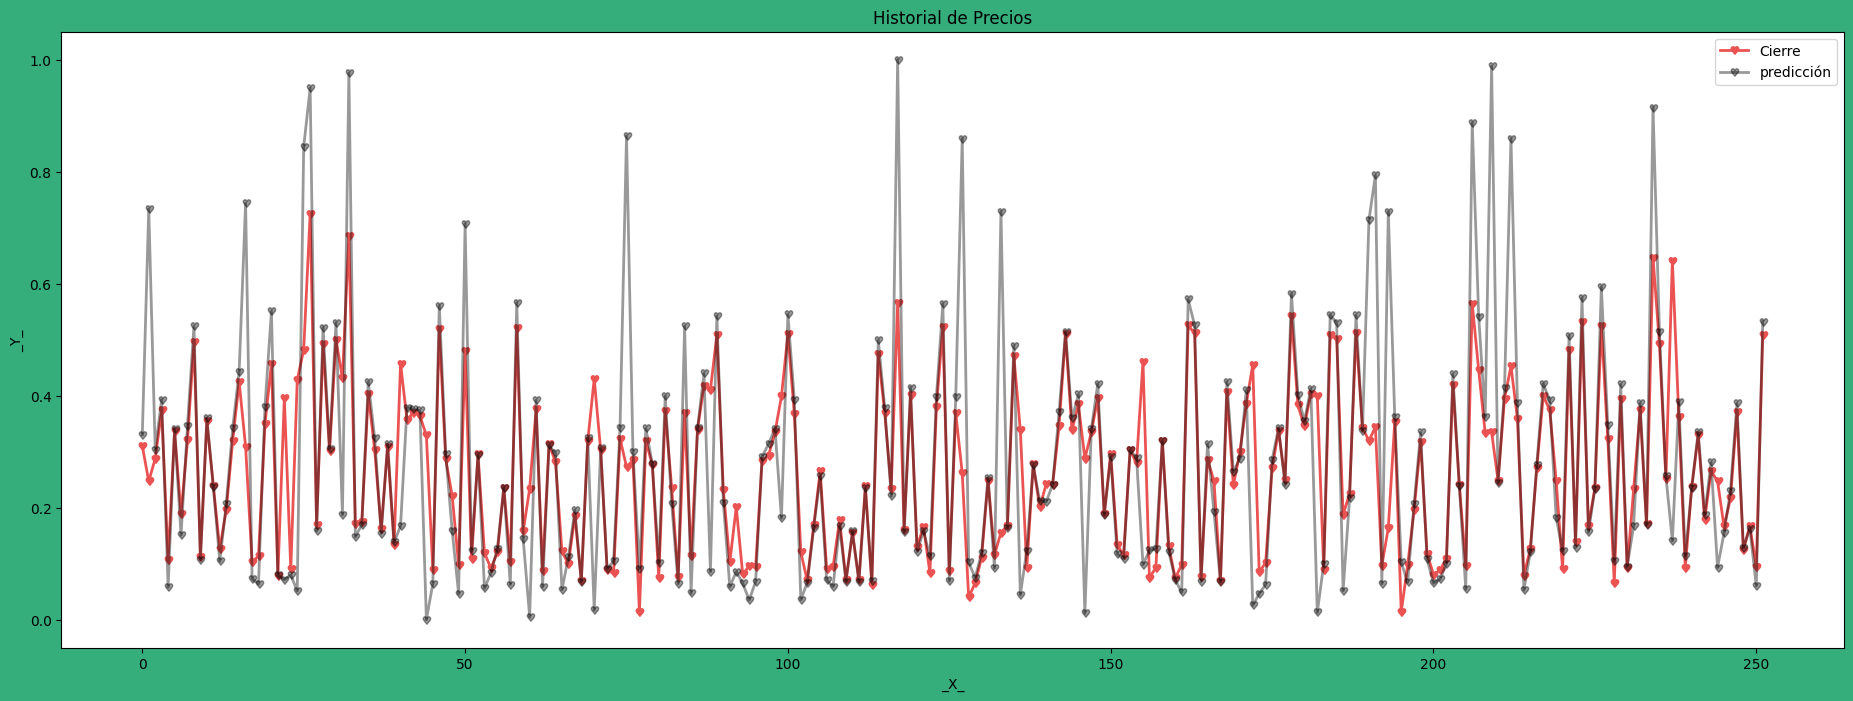

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(23, 8))
fig.set_facecolor('#36AE7C')
ax.plot(predicciones, marker = "$♥$",markersize=6,linewidth=2,linestyle='solid' ,color="#EB5353")
ax.plot(Y_test[:,0], marker = "$♥$",markersize=6,linewidth=2,linestyle='solid' ,color="#000000", alpha=0.4)
plt.title('Historial de Precios')
plt.xlabel('_X_')
plt.ylabel('_Y_')
ax.legend(['Cierre','predicción'])
ax.set_facecolor("#ffffff")

plt.show()

Probar prediccion con nuevos datos

In [79]:
datos_nuevos = np.array([[0.09701243, 0.09834351, 0.09823458, 0.22993592]])  # Ingresa los valores de Open, High, Low y Volume
datos_nuevos2 = np.array([[0.09701243, 0.09834351, 0.09823458, 0.22993592]]) 
datos_nuevos = np.reshape(datos_nuevos, (datos_nuevos.shape[0], datos_nuevos.shape[1], 1))

prediccion = modelo.predict(datos_nuevos)

close_predicho = prediccion[0, 0]

print("El valor predicho para Close es:", close_predicho)

1/1 [==============================] - 0s 24ms/step
El valor predicho para Close es: 0.23913151


In [80]:
datos_nuevos2[0][0]

0.09701243

In [88]:
#obtener los valores reales para saber los precios de variables independientes ------------
variables = ['Open', 'High', 'Low', 'Volume']
vals= []

for i,col in enumerate(variables):
  val = (datos_nuevos2[0][i] * (data[col].max() - data[col].min())) + data[col].min() #Open, High, Low y Volume
  vals.append(val)

vals

[331.2700018708, 333.8699992997, 329.0799994736, 5749399.9224]

In [87]:
val1 = (datos_nuevos2[0][0] * (data['Open'].max() - data['Open'].min())) + data['Open'].min() #Open, High, Low y Volume
val2 = (datos_nuevos2[0][1] * (data['High'].max() - data['High'].min())) + data['High'].min()
val3 = (datos_nuevos2[0][2] * (data['Low'].max() - data['Low'].min())) + data['Low'].min()
val4 = (datos_nuevos2[0][3] * (data['Volume'].max() - data['Volume'].min())) + data['Volume'].min()

print(val1,val2,val3,val4)

331.2700018708 333.8699992997 329.0799994736 5749399.9224


In [26]:
X[1], y[1] #se estandarizan de 0 a 1 

(array([0.09701243, 0.09834351, 0.09823458, 0.22993592]), array([0.24151427]))

In [27]:
data.iloc[1,:]

Open          331.27
High          333.87
Low           329.08
Close         666.45
Volume    5749400.00
Name: 2012-01-04 00:00:00, dtype: float64

In [28]:
min = data['Close'].min()
rango = data['Close'].max() - data['Close'].min()

close_pred = ((close_predicho * rango) + min)

print(close_pred)

666.7279052779078


Probar con valores que ingresa el usuario

In [91]:
datos = []
for i in range(0,4):
  num = float(input('ingrese num: '))
  datos.append(num)

#datos = [num1,num2,num3,num4]

ingrese num: 331.27
ingrese num: 333.87
ingrese num: 329.08
ingrese num: 5749400.00


In [92]:
 # Ingresa los valores de Open, High, Low y Volume
datos = sc_x.fit_transform(X)

datos = np.reshape(datos, (datos.shape[0], datos.shape[1], 1))

predicc = modelo.predict(datos)

close_p = predicc[0, 0]

print("El valor predicho para Close es:", close_p)

40/40 [==============================] - 0s 3ms/step
El valor predicho para Close es: 0.23111403


In [93]:
min = data['Close'].min()
rango = data['Close'].max() - data['Close'].min()

close_p = ((close_p * rango) + min)

print(close_p)

658.9032735049724


Guardar resultados

In [39]:
df_results = pd.DataFrame({'Close': sc.inverse_transform(Y_test.reshape(-1, 1)).flatten(),
                           'Predictions': sc.inverse_transform(predicciones).flatten()})

In [40]:
# Mostrar el DataFrame
df_results

,Close,Predictions
0,730.96,716.300110
1,1023.30,670.467529
2,711.12,700.033081
3,776.43,762.417664
4,533.57,568.104980
...,...,...
247,771.46,760.114319
248,584.48,581.529846
249,609.35,613.210510
250,535.04,559.055115
